/var/folders/fn/w8_9ym890lv7z623klj52gqm0000gn/T/ipykernel_98443/28254620.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  CNNmodel.load_state_dict(torch.load(CNNmodel_p

K: Accuracy: 0.5500 | Brier Score: 0.0785 | Cross-Entropy Loss: 1.5474
Q: Accuracy: 0.5780 | Brier Score: 0.0801 | Cross-Entropy Loss: 1.5474
R: Accuracy: 0.4880 | Brier Score: 0.1039 | Cross-Entropy Loss: 1.5474
B: Accuracy: 0.4669 | Brier Score: 0.0940 | Cross-Entropy Loss: 1.5474
N: Accuracy: 0.5364 | Brier Score: 0.0970 | Cross-Entropy Loss: 1.5474
P: Accuracy: 0.5843 | Brier Score: 0.1308 | Cross-Entropy Loss: 1.5474

Total Accuracy: 0.5378
Weighted Accuracy: 0.5378


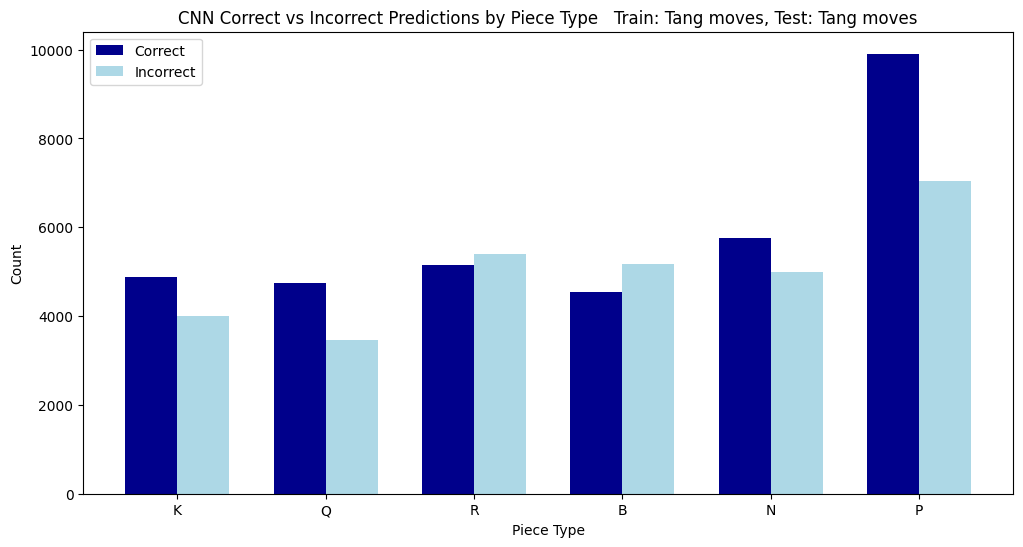


Overall Metrics Summary:
  Piece Type  Accuracy    Recall  F1 Score  Vanilla Brier Score  \
0          K  0.549955  0.549955  0.553285             0.078471   
1          Q  0.577973  0.577973  0.512505             0.080076   
2          R  0.488002  0.488002  0.486157             0.103883   
3          B  0.466866  0.466866  0.491736             0.094026   
4          N  0.536372  0.536372  0.534780             0.096996   
5          P  0.584346  0.584346  0.604878             0.130846   

   Normalized Brier Score  Number of Samples  
0                3.446491               8888  
1                3.808347               8208  
2                3.846387              10543  
3                3.776947               9718  
4                3.522225              10750  
5                3.012721              16954  


 97%|█████████▋| 248/255 [00:06<00:00, 38.26it/s]

In [ ]:
import sys
sys.path.append("..")
import torch
import torch.nn as nn
from generating_data.generate_loaders import (
    create_Tang_multi_loaders,
    create_GM_test_multi_loaders
    )
from models.CNNs import flexCNN
from models.MLPs import flexMLP
from testingFunctions import evaluate_per_piece_metrics

CNNmodel = flexCNN(2, 1, [3,3])
CNNmodel_path = '../savedModels/importantModels/movesCNN.pt'
CNNmodel.load_state_dict(torch.load(CNNmodel_path))

MLPmodel = flexMLP(hidden_sizes=[128,64,32], num_affine_layers=3)
MLPmodel_path = '../savedModels/MLPgridSearch/3aff_nesterov.pt'
MLPmodel.load_state_dict(torch.load(MLPmodel_path))

Tang_train_loader, Tang_val_loader, Tang_test_loader = create_Tang_multi_loaders('../data/pkl/moves/Tang_moves.pkl')
device = "cpu"

train_name = 'Tang moves'
test_name = 'Tang moves'

df_metrics = evaluate_per_piece_metrics(CNNmodel, Tang_test_loader, 'Tang', device, train_name=train_name, test_name=test_name, model_name='CNN')
df_metrics = evaluate_per_piece_metrics(MLPmodel, Tang_test_loader, 'Tang', device, train_name=train_name, test_name=test_name, model_name='MLP')